# Things to do next tiem
Last time I reversed the order for taking punctuation and stopwords. I want to revert back to original. I remove all punctuation besides a single apostrophe, then remove all stop words.  
The reason is that i'm still noticing a lot of stop words in teh common words and I think it is because they were next to a punctuation.

Phantom of the Opera Script Here: https://www.allmusicals.com/lyrics/phantomoftheoperathe/script.htm  
Full phantom script: http://copioni.corrierespettacolo.it/wp-content/uploads/2016/12/LLOYD%20WEBBER%20Andrew__The%20phantom%20of%20the%20opera__inglese__null__Musical__0.pdf  
Hamilton Script: http://alessandrabourdot.com/wp-content/uploads/2016/07/Alexander_Hamilton_Lyrics.pdf
      
Code  
Wordcloud package documentation
- http://amueller.github.io/word_cloud/auto_examples/index.html
- https://github.com/amueller/word_cloud

Inspiration  
Tiger King Twitter portrait
- https://towardsdatascience.com/understanding-the-tiger-king-and-his-tweets-through-python-b928f92af05d  

Twitter word clouds
- https://medium.com/@shsu14/introduction-to-data-science-custom-twitter-word-clouds-704ec5538f46

# Introduction

Data can difficult to understand. To some, "data" can look like a bunch of zeros and ones surging across the monitor with alien-like digital beeps. 

In [ ]:
#Import library
from IPython.display import Image
Image(filename = "matrix.jpg", width = 400, height = 300)

That is why data visualization is so important! Data visualization is the balance of art and science to better see and understand data, allowing hidden stories to be told. 

This project was conceived as a birthday surprise to my sister, who is an avid fan of Broadway. I kid you not, she has literally watched Phantom of the Opera XX times, Les Mis XXX times, etc. Unlike her, I am personally not a huge fan of theater and operas. I have not watched a single show on Broadway, and if I was to read through a script, dear me I would swear I've found a cure to insomnia. 

In this project, I wanted to see if I could "tell the story" of a Broadway show using data visualization. The approach is to take a complete script of a musical, parse through the text and document the most frequently occuring words, and capture the gist of a theatrical show using nothing but a picture and a word cloud. Words that appear more frequently will appear larger in the word cloud. They say a picture is worth a thousand words and voila! they weren't kidding. 

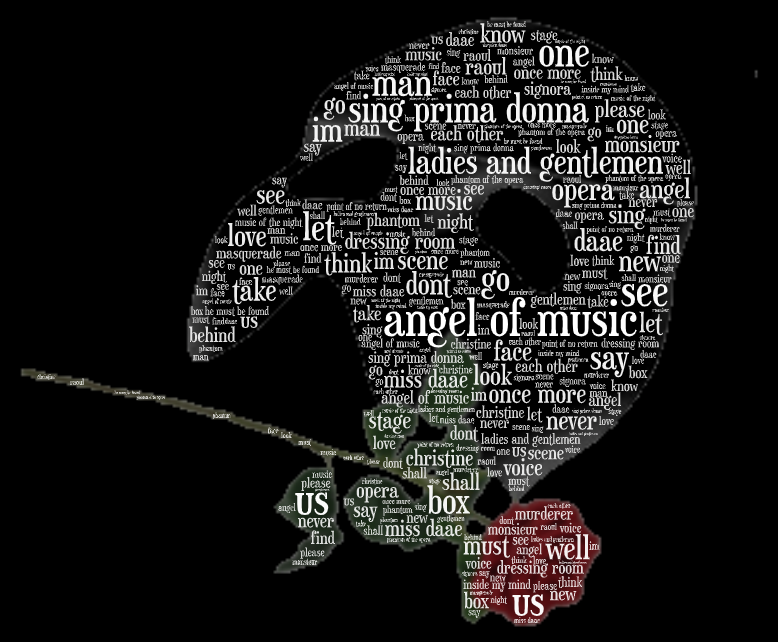

Let me walk you through the steps I took to generate this word cloud.

# Import Statements

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import string

# import the natural learning toolkit for natural language processing
import nltk
from nltk.corpus import stopwords

# Selenium Module opens a web browser that you can programmatically control from your python program
from selenium import webdriver

# nltk Stopwords Download

In [ ]:
# Download the stopwords package from the interactive shell. You'll only have to do this once and if you haven't downloaded this library before
# nltk.download_shell()

# Data Input and Cleaning

Copy and paste the full script of the musical/movie/book to a text file and read it using python 

In [ ]:
# read in file containing the full script of the musical
# script = open('Hamilton_full_script.txt')
script = open('Phantom_of_the_Opera.txt')
text = script.read()
script.close()

In [ ]:
text[:500]

From looking at the first 500 characters of the script, we can see there are certain elements we want to leave off the wordcloud. For example, there are a lot of newline characters represented by '\n'. Additionally, I don't want to keep punctuation marks in my word cloud. We also see a lot of upper case words like AUCTIONEER, PORTERS, and RAOUL that signal each character's actions or lines. Other capitalized words like "THE STAGE OF THE PARIS OPERA" describe the setting of the play. Because all of these words aren't spoken in the play, I will take them out of the analysis.     

### Replacing line breaks

In [ ]:
# replace all line breaks with a single space.
text = text.replace('\n', ' ')

In [ ]:
# double check to see if line breaks were removed as intended
text[:200]

### Removing upper-case words

In [ ]:
# remove all the words that are Capitalized since they represent a character speaking or setting the stage
text = [word.lower() for word in text.split() if (not word.isupper() or word == 'I')]

In [ ]:
text = ' '.join(text)

In [ ]:
text[:200]

In [ ]:
all_words = text

### Removing punctuation

I don't want to include any punctuation marks in my word cloud so let's remove those as well

In [ ]:
# I noticed some scripts use "curly" instead of "straight" quotes
text = text.replace('’', "'")

In [ ]:
# Python's built in string library contains all the punctuation marks
string.punctuation

In [ ]:
# From experience,I realized it is better to first remove all punctuation (except for single apostrophes) before 
# removing stop words (that may contain single apostrophes) since commas or periods are often next to stop words
# and Python will have a hard time removing stop words if they are touching punctuation.
punc_except_apostrophe = string.punctuation.replace("'", '')

In [ ]:
# remove all the punctuation from the text using list comprehension
text = [c for c in text if c not in punc_except_apostrophe]

In [ ]:
# put the text back together
text = ''.join(text)

In [ ]:
text[:200]

### Filter Stop Words

In [ ]:
c = Counter(text.split())        
c.most_common(30)

In [ ]:
# As expected, the most commonly occuring words are very common words.
# Let's remove these common words like "the", "a", "if", etc. aka stop words
# The nltk library contains the most common stopwords
stopwords.words('english')

In [ ]:
text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

In [ ]:
text = ' '.join(text)

In [ ]:
text[:200]

In [ ]:
clean_words = text.split()

# Most Common Words

In [ ]:
c = Counter(clean_words)        

In [ ]:
c.most_common(68)

Let's visualize the words in the Phantom of the Opera

In [ ]:
# Code adapted from https://towardsdatascience.com/understanding-the-tiger-king-and-his-tweets-through-python-b928f92af05d
# Analyze Frequency
frequency_dist = nltk.FreqDist(clean_words)
word_dict = sorted(((count, word) for (word,count) in frequency_dist.items()))#, reverse=True)
counts, word = zip(*word_dict) # unpack a list of pairs into two tuples

In [ ]:
import matplotlib.pyplot as plt
num_to_show = 40
plt.figure(figsize=[6,10])
plt.plot(counts[-num_to_show:], word[-num_to_show:],lw=6,c='r')
plt.ylabel('Word',fontsize=20)
plt.yticks(fontsize=14)
plt.xlabel('Num Times Used',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [ ]:
# store most common words in a df for easy import into wordart.com later
most_common_words_df = pd.DataFrame(c.most_common(68), columns=['Word(s)', 'Count'])
most_common_words_df.head()

# N-grams and Collocations

Besides individual words, I also want to capture meaningful phrases in the word cloud. A few definitions before we begin: According to the Oxford dictionary, a **bigram** is "a pair of consecutive written units such as letters, syllables, or words." In our case, we only care about word pairs. Similarly, a **trigram** is a group of 3 words that appear together, and an **n-gram** is a sequence of n items. 

To get common phrases within the script, I create a counter for the most common n-grams for 2-5 words. However, we don't necessarily just want the most frequent word pairs as we may end up with a bunch of common word phrases with no significance, like "and the", "over there", and "is a". Instead, we can look at **collocations**. According to Wikipedia, "a collocation is a series of words or terms that co-occur more often than would be expected by chance." Whereas the n-grams approach returns the most frequent phrases and can end up with an overrepresentation of  common words, collocations return the more interesting and informative phrases.

The nltk library has a BigramCollocationFinder and a TrigramCollocationFinder. Once the bigrams or trigrams are extracted from the data, you can then find the ones that have the highest likelihood ratio to find the words that are paired more than you would expect them to by random chance.

To illustrate this point, let's look at both n-grams and collocations. First, I will just look at the most frequently occurring bigrams. 

## Bigrams

In [ ]:
# remove all the punctuation from the text using list comprehension
text = [c for c in all_words if c not in string.punctuation]

In [ ]:
# text

In [ ]:
# put the text back together
text = ''.join(text)

In [ ]:
text[:200]

In [ ]:
words = text.split()

In [ ]:
# Python has a ngram function as part of NLTK library which helps us generate ngrams.
# let's take a look at the first 10 bigrams generated
counter = 0
for bigram in nltk.ngrams(words,2):
    if counter <10:
        print(bigram)
        counter += 1
    else: 
        break

In [ ]:
# https://stackoverflow.com/questions/12488722/counting-bigrams-pair-of-two-words-in-a-file-using-python
# I want to count which bigrams occur most frequently so we can pass the nltk ngram generator into a counter
# To make this easy to read, let's pass it into a dictionary with the bigram as the key and the occurence count as the value
bigram_count_dict = dict(Counter(nltk.ngrams(words,2)).most_common(10))
bigram_count_dict

In [ ]:
# Let's store the bigrams and their counts in a dataframe
bigram_df = pd.DataFrame(columns=["Word(s)", "Count"]) # initialize dataframe with two columns
for key, val in bigram_count_dict.items():
    # append row to the dataframe
    new_row = {"Word(s)": ' '.join(key), "Count":val}
    bigram_df = bigram_df.append(new_row, ignore_index=True)
bigram_df

Unsurprisingly, you can see that bigrams returns a lot of common word phrases that are not surprising or interesting, like "of the", "in the", "to the". 
Next I'll use the BigramCollocationFinder to find bigram collocations

In [ ]:
# Code adpated from https://www.geeksforgeeks.org/nlp-word-collocations/
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 

bigram_collocation = BigramCollocationFinder.from_words(words) 
# only bigrams that appear 3+ times
bigram_collocation.apply_freq_filter(3) 
# return the 20 bigrams with the highest likelihood_ratio
bigram_collocation.nbest(BigramAssocMeasures.likelihood_ratio, 20)

The bigram collocations definitely look more interesting than before. Unlike with the n-grams, the BigramCollocationFinder doesn't return the frequency count for the collocations. Instead, I have a 'score' for each n-gram scored according to some association measure in order to determine the relative likelihood of each ngram being a collocation. Instead of using the word count for the size of the word in the word cloud, I'll use this score. 

In [ ]:
bigram_collocation.score_ngrams(BigramAssocMeasures.likelihood_ratio)[:20]

In [ ]:
# Let's store the bigram collocations in a dataframe
bigram_collocations = dict(bigram_collocation.score_ngrams(BigramAssocMeasures.likelihood_ratio)[:20])
bigram_collocations_df = pd.DataFrame(columns=["Word(s)", "Count"])
for key, val in bigram_collocations.items():
    # append row to the dataframe
    new_row = {"Word(s)": ' '.join(key), "Count":val}
    bigram_collocations_df = bigram_collocations_df.append(new_row, ignore_index=True)
bigram_collocations_df

In [ ]:
# looking at the collocations, some boring phrases are still included like "i am" and "of the". 
# I'll hand pick the bigram collocations by index position to include in the word cloud 
selected_bigram_collocations = [0,2,6,12,14,19] # create a list of desired bigram collocations by index  
selected_bigram_df = bigram_collocations_df.iloc[selected_bigram_collocations]

## Trigrams

Now I do the same thing with trigrams. First I'll look at ngrams, and then collocations

In [ ]:
three_gram = dict(Counter(nltk.ngrams(words,3)).most_common(29))
three_gram_df = pd.DataFrame(columns=["Word(s)", "Count"])
for key, val in three_gram.items():
    # append row to the dataframe
    new_row = {"Word(s)": ' '.join(key), "Count":val}
    three_gram_df = three_gram_df.append(new_row, ignore_index=True)
three_gram_df

In [ ]:
# Loading Libraries 
from nltk.collocations import TrigramCollocationFinder 
from nltk.metrics import TrigramAssocMeasures 
  
trigram_collocation = TrigramCollocationFinder.from_words(words) 
trigram_collocation.apply_freq_filter(3) 
  
trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 15) 

In [ ]:
three_gram_collocations = dict(trigram_collocation.score_ngrams(TrigramAssocMeasures.likelihood_ratio)[:27])
three_gram_collocations_df = pd.DataFrame(columns=["Word(s)", "Count"])
for key, val in three_gram_collocations.items():
    # append row to the dataframe
    new_row = {"Word(s)": ' '.join(key), "Count":val}
    three_gram_collocations_df = three_gram_collocations_df.append(new_row, ignore_index=True)
three_gram_collocations_df

In [ ]:
# hand pick the trigram collocations by index position to include in the word cloud 
selected_trigram_collocations = [2,10,13] # create a list of desired trigram collocations by index  
selected_trigram_df = three_gram_collocations_df.iloc[selected_trigram_collocations]

## Quadgrams

When looking at 4 word sequences, the benefits of collocations are vastly reduced and we can just look at frequently occurring n-grams. With phrases this long, common word jumbles are less likely to appear by chance, and we can expect frequently occurring 4-grams to have significant meaning. Let's see this is action

In [ ]:
four_gram = dict(Counter(nltk.ngrams(words,4)).most_common(15))
four_gram_df = pd.DataFrame(columns=["Word(s)", "Count"])
for key, val in four_gram.items():
    # append row to the dataframe
    new_row = {"Word(s)": ' '.join(key), "Count":val}
    four_gram_df = four_gram_df.append(new_row, ignore_index=True)
four_gram_df

As evident, the phrases are not as random while looking at 4-grams. 

In [ ]:
# hand pick the four_grams by index position to include in the word cloud 
selected_four_grams = [0,8] # create a list of desired four_grams by index  
selected_four_gram_df = four_gram_df.iloc[selected_four_grams]

## 5-grams

In [ ]:
five_gram = dict(Counter(nltk.ngrams(words,5)).most_common(10))
five_gram

Here it's beginning to look like the 5-grams are at a length that they include more than just the interesting words. We see many common words in the phrases as well. For example, the second most frequently occuring 5-gram is "phantom of the opera is". The last word "is" seems pretty useless. 
At this length of 5 words, the phrases are less pithy and may look out of place in a word cloud. We'll stop at 4 word phrases.

In [ ]:
five_gram_df = pd.DataFrame(columns=["Word(s)", "Count"])
for key, val in five_gram.items():
    # append row to the dataframe
    new_row = {"Word(s)": ' '.join(key), "Count":val}
    five_gram_df = five_gram_df.append(new_row, ignore_index=True)
five_gram_df

# Combine Dataframes

In [ ]:
# # Do I want to take out single words that are part of the n-grams?
# df4 = pd.concat([selected_bigram_df, selected_trigram_df, selected_four_gram_df], ignore_index=True)
# ' '.join(df4['Word(s)'])

In [ ]:
# append the dataframes for the ngrams with the most common words df
words_and_phrases_df = most_common_words_df[:60]
words_and_phrases_df = words_and_phrases_df.append([selected_bigram_df, selected_trigram_df, selected_four_gram_df], ignore_index=True)
words_and_phrases_df.tail(20)

# Domain Expertise 

In [ ]:
# it's important to work with the domain experts and get their inputs to add any phrases that may have been missed and are particularly important
# in my case I could always ask my sister. Also, I looked up important quotes from Phantom of the Opera to add into the cloud
additional_words = {'inside my mind':200, 'point of no return':200, 'murderer':200, 'he must be found':200, 
                    'music shall caress you': 200, 'sweet intoxication': 200, 'Love me': 200, 'goodbye':200, 
                    'Free her': 200, 'no compassion':200, 'think of me': 200, 'point of no return':200, 
                   'somehow here again':200, 'down once more':200, 'lonely':200}

In [ ]:
additional_words

In [ ]:
for key, value in additional_words.items():
    new_row = {'Word(s)':key, 'Count':value}
    #append row to the dataframe
    words_and_phrases_df = words_and_phrases_df.append(new_row, ignore_index=True)

In [ ]:
words_and_phrases_df.tail()

In [ ]:
# apply some word styling (This is completely optional and you could just do this on the website interface)
# words_and_phrases_df['Color'] = 'FFFFFF' #FFFFFF is the hex color code for white
words_and_phrases_df['Color'] = 'Default'
words_and_phrases_df['Angle'] = 'Default' 
words_and_phrases_df['Font'] = 'Euphorigenic Regular' # A font seemingly fitting for Phantom of the Opera

In [ ]:
words_and_phrases_df.tail()

In [ ]:
# copy the dataframe to clipboard. The excel argument copies in a CSV format, and I leave off the indices and header row  
words_and_phrases_df.to_clipboard(excel=True, index=False, header=False)

# Creating Word Cloud in Browser
This section automatically launches a web browser that goes to [wordart.com](https://wordart.com/) and populates the text input with the words and frequency you have extracted from the movie script. Let me note the following section is completely optional and you could just as easily (probably more easily) get the same results on wordart.com. I was just testing out some browser automation skills I learned (and automating it appealed to my lazy self too!)

For the next part, you will have to download a driver. Every browser has its own driver. Selenium is just a tool which enables to you to "talk" to the browser. Here, I will be using Google Chrome as my preferred browser. You can download the ChromeDriver here: https://sites.google.com/a/chromium.org/chromedriver/downloads

Then you have multiple options:
1) add it to your system path. [Guide](https://zwbetz.com/download-chromedriver-binary-and-add-to-your-path-for-automated-functional-testing/)   
2) put it in the same directory as your python script  
3) specify the location directly via executable_path like:  
driver = webdriver.Chrome(executable_path='C:/path/to/chromedriver.exe')

Source: https://stackoverflow.com/questions/40555930/selenium-chromedriver-executable-needs-to-be-in-path

I understand the following code is not super helpful in the sense that it takes more time and effort to automate this process than to navigate to wordart.com in your own browser and paste your words into the UI yourself. I did this for my self-learning and practicing concepts for using selenium, but feel free to skip over this section. I also won't go into how to find CSS selectors as that is not the point of this code share, but if there is enough demand I may write a Medium post on Selenium basics

One more note: The following code may not work when you test it if the website has changed since the code was written.

In [ ]:
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
# incognito window
# chrome_options.add_argument("--incognito")
chrome_options.add_argument('start-maximized')

browser = webdriver.Chrome(options=chrome_options)
browser.get('https://wordart.com/create')

# When a page is loaded by the browser, the elements within that page may load at different time intervals. 
# If an element has not yet loaded in the webpage, the find_element_by_css_selector function may raise an NoSuchElementException exception. 
# Using waits, we can solve this issue. An implicit wait makes WebDriver poll the page for a certain amount of time when trying to locate an element, before throwing an exception.
# https://selenium-python.readthedocs.io/waits.html
browser.implicitly_wait(10) # seconds

# select the Import button under the WORDS banner using the CSS selector
words_import_elem = browser.find_element_by_css_selector('#root > div > div.app-body > div.app-body-pane.app-body-left-pane > div > div.accordion-section.selected > div.accordion-section-body > div > div:nth-child(1) > span.words-import > button') 
words_import_elem.click()
browser.implicitly_wait(10)
# select the text box and paste in words and values that were copied onto the clipboard
textbox_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-body > div:nth-child(1) > textarea')
textbox_elem.click()
textbox_elem.click()
import time
time.sleep(3)
import pyautogui #allows you to control your keyboard using python
time.sleep(3)
pyautogui.hotkey('ctrl', 'v')
time.sleep(3)
# make sure the CSV format box is checked if importing from Excel
checkbox_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-body > div.words-import-options > span.component-checkbox.noselect.words-import-options-csv-format > label > div')
checkbox_elem.click() 
browser.implicitly_wait(10)
# click the import words button to submit
import_words_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-footer > button.btn.btn-dark')
import_words_elem.click()
browser.implicitly_wait(10)
# click the options button to adjust word options
options_elem = browser.find_element_by_css_selector('#root > div > div.app-body > div.app-body-pane.app-body-left-pane > div > div.accordion-section.selected > div.accordion-section-body > div > div:nth-child(1) > div > button')
options_elem.click()
browser.implicitly_wait(10)
# click the use size column button to adjust word sizes
use_size_column_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-body > div:nth-child(2) > div.radio-buttons > div > button:nth-child(2)')
use_size_column_elem.click()
close_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-footer > button')
close_elem.click()
browser.implicitly_wait(10)
# clicke the SHAPES banner 
shapes_elem = browser.find_element_by_css_selector('#root > div > div.app-body > div.app-body-pane.app-body-left-pane > div > div:nth-child(2) > div.header.noselect')
shapes_elem.click()
browser.implicitly_wait(10)
time.sleep(1)
# click the add image button 
add_image_elem = browser.find_element_by_css_selector('#root > div > div.app-body > div.app-body-pane.app-body-left-pane > div > div.accordion-section.selected > div.accordion-section-body > div > div.shapes-panel > button.shapes-add-image-button.shapes-add-button.btn.btn-success.btn-sm')
add_image_elem.click()
browser.implicitly_wait(10)
# paste image link
add_image_link_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-body > div.input-group > input')
add_image_link_elem.send_keys('https://imaging.broadway.com/images/poster-178275/w300/112575-11.jpg')
load_image_link_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-body > div.input-group > div > button')
load_image_link_elem.click()                                                           
browser.implicitly_wait(10)
# click ok
ok_elem = browser.find_element_by_css_selector('body > div:nth-child(14) > div > div.modal.fade.show > div > div > div.modal-footer > button.btn.btn-dark')
ok_elem.click()
browser.implicitly_wait(10)
# click the visualize button to visualize the word cloud
visualize_elem = browser.find_element_by_css_selector('#root > div > div.app-body > div.app-body-pane.app-body-right-pane > div.sub-panel > button.btn.btn-danger')
visualize_elem.click()




# Conclusion
And bah-dah-bing bah-dah-boom you've got yourself the beginnings of a wordcloud! At this point, the process automation ends and the design of the word cloud is totally in the user's hands. There are many many features of the word cloud that you can customize, so it doesn't make sense to automate the rest. For example, we can change word font/colors, alignment, density, and much more! Try it out!

I know there is a python package for creating wordclouds, but honestly I think wordart.com had some of the best free options for creating aesthetically pleasing word clouds. Also, the interactivity of a web interface just can not be replicated in Python as it allows you to channel a more artistic side. Overall, I am happy how the word clouds turn out, and I'd love to see it be used with books, movie scripts, poems, and anything else! If anyone decides to run with these ideas, please message me with the finished product as I would love to see how it turns out! 

### Problems Encountered
While working on this project, there were some main problems I encountered. 
1) Finding a full script readily available on the internet. Scripts found online may be fan transcribed, inaccurate, or not publicly/freely available. It takes some digging around and manipulation to find clean data  
2) Frequently occurring words may not represent the spirit of the script. In theory, most common words could correlate with most important words, but in reality they may not be the most significant words/phrases in a script. Sometimes, one-liners are the most memorable parts of a movie/show.  
3) Without domain expertise, I have no way of knowing how well my word cloud tells the story of a show. This projecet highlights the neccessity of data science paired with domain knowledge to build a great final product. Luckily for me, I had my expert sister on my side and could tweak the word cloud as needed. I also looked up significant quotes from the Phantom of the Opera to include in the cloud.

### Future Work
There a few ideas for future work.
1) Maybe instead of taking the entire script to generate the word cloud, it may be more impactful to take 1-3 of her favorite songs, and insert lines into the word clouds instead of just singular words.  
2) Automate taking out individual words and small collocations if they are a part of larger collocations. This would reduce redundancy in a word cloud, although you may not see visible impacts. The tricky part is that you also want to avoid getting as large of collocations as possible that contain more than the interesting words. I think this is where manual work, combined with context and domain knowledge, is necessary.   


# use opencv to make my own picture, like make mask negative and add a rose  

The last step is to consult with Emily about the most common words, importance of the  bigrams and collocations, and of course how the word cloud design.
Like any major data science project, working closely with the subject matter experts is critical to a prject's success. [insert  something to elaborate on this idea]
